### Problem Statement :

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 



### Step 1: Reading and Understanding the Data

Import all libraries required to analyse Bike sharing dataset

In [21]:
#akhilrahhate09@gmail.com
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
# Importing RFE and Linear Regression Model
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

In [22]:
# read csv
bike = pd.read_csv("day.csv")
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [23]:
bike.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796
729,730,31-12-2019,1,1,12,0,1,1,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729


In [24]:
bike.shape

(730, 16)

In [25]:
# renaming few columns for better readibility

bike.rename(columns={'yr':'year','mnth':'month','hum':'humidity','cnt':'count'}, inplace=True)

In [26]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   year        730 non-null    int64  
 4   month       730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  humidity    730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  count       730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [27]:
bike.describe()

,instant,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [28]:
# To check the columns with null values or blank values.

bike.isnull().sum()

instant       0
dteday        0
season        0
year          0
month         0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

No null values in the given columns

In [29]:
# Copying the dataframe into new to rename columns and values for better data visualization
df = bike.copy()

In [30]:
df.shape

(730, 16)

In [31]:
# drop unwanted columns
# instant : record index not required.
# casual and registered : count used which is cumulative of both
# dteday : yr and mnth column is enough

bike  = bike.drop(['instant','dteday','casual','registered'], axis=1)
bike.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [32]:
# Mapping season column
bike.season = bike.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [33]:
# Mapping month column
bike.month = bike.month.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

In [34]:
# Mapping weekday column
bike.weekday = bike.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

In [35]:
#Mapping weather column
bike.weathersit = bike.weathersit.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})

In [36]:
bike.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [37]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   year        730 non-null    int64  
 2   month       730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  count       730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB



### Step 2: Visualising the Data

Let's now spend some time doing what is arguably the most important step - understanding the data.

If there is some obvious multicollinearity going on, this is the first place to catch it Here's where you'll also identify if some predictors directly have a strong association with the outcome variable We'll visualise our data using matplotlib and seaborn.

### Visualising Categorical Variables

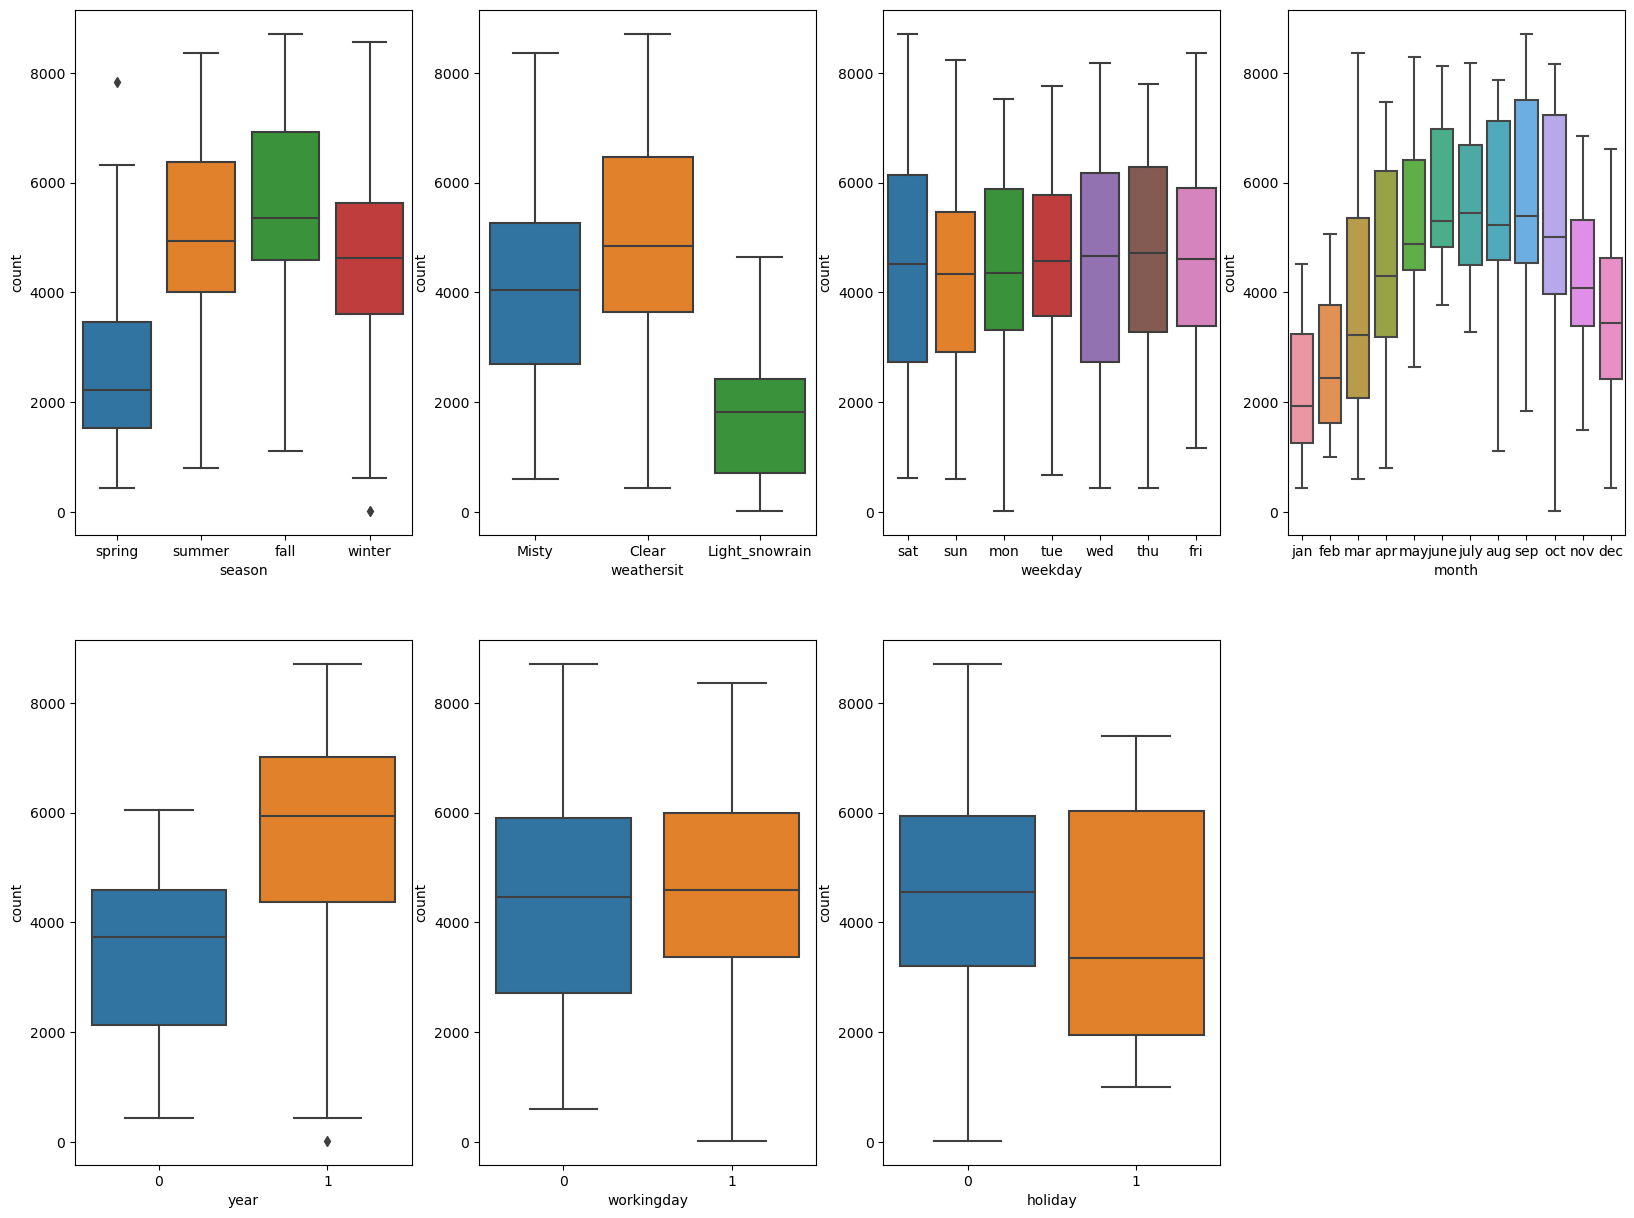

In [38]:
# season is categorical data and cnt is continuous data
plt.figure(figsize = (20 , 15))

#2 rows 4 columns 1st one
plt.subplot(2,4,1)
sns.boxplot(x='season', y='count', data=bike)

plt.subplot(2,4,2)
sns.boxplot(x='weathersit', y='count', data=bike)

plt.subplot(2,4,3)
sns.boxplot(x='weekday', y='count', data=bike)

plt.subplot(2,4,4)
sns.boxplot(x='month', y='count', data=bike)

plt.subplot(2,4,5)
sns.boxplot(x='year', y='count', data=bike)

plt.subplot(2,4,6)
sns.boxplot(x='workingday', y='count', data=bike)

plt.subplot(2,4,7)
sns.boxplot(x='holiday', y='count', data=bike)

plt.show()

In [39]:
# function to create barplot related to categorical columns

def plot_cat_columns(column):
    plt.figure(figsize = (12,6))
    plt.subplot(1,2,1)
    sns.barplot(x = column,y ='count',data=bike)
    plt.subplot(1,2,2)
    sns.barplot(x = column,y ='count',data=bike, hue='year',palette='Set2')
    plt.legend(labels=['2018', '2019'])
    plt.show()

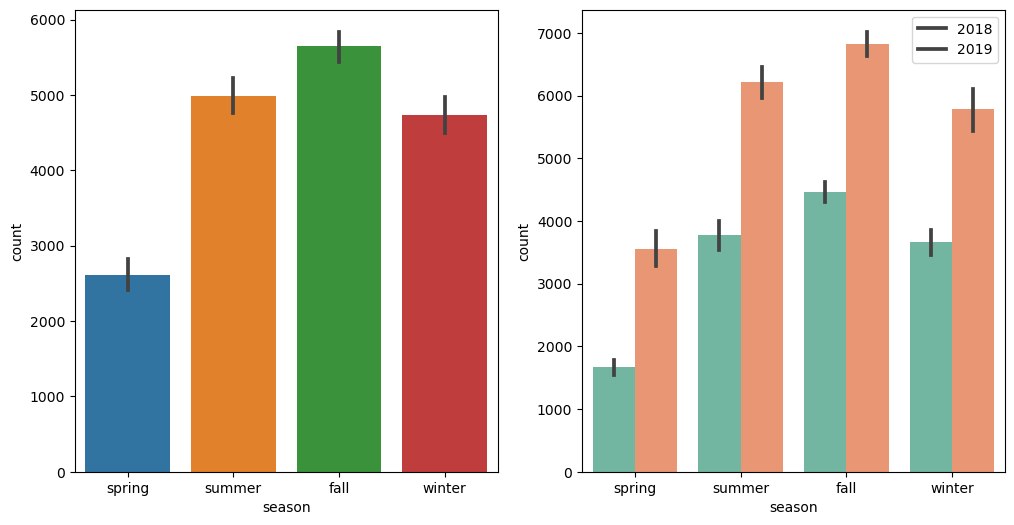

In [40]:
# plotting visualization for season column

plot_cat_columns('season')

More number of bikes were booked during the fall season. Bike booking has increased drastically from 2018 to 2019

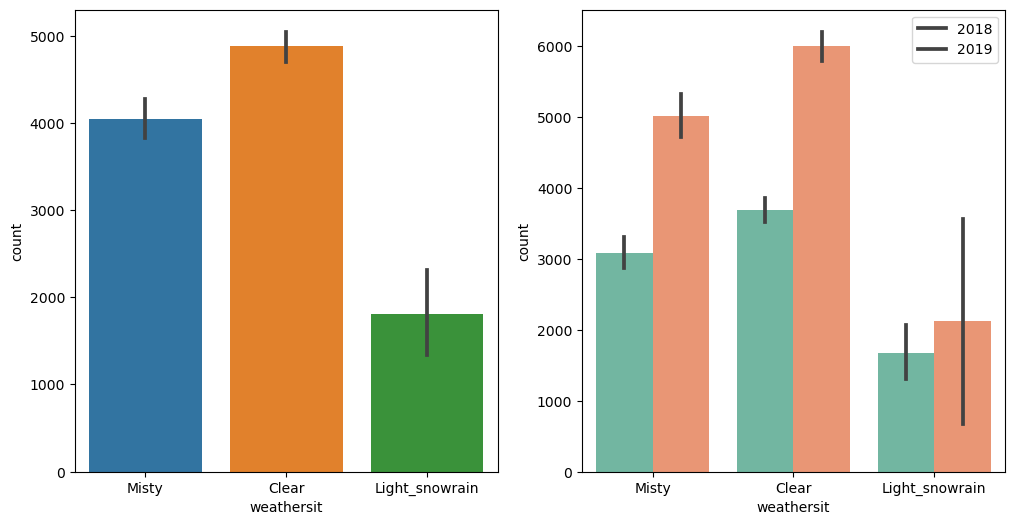

In [41]:
# plotting visualization for weathersit column

plot_cat_columns('weathersit')

Demand for bike booking is more in Clear weather. Bike booking has increased drastically from 2018 to 2019

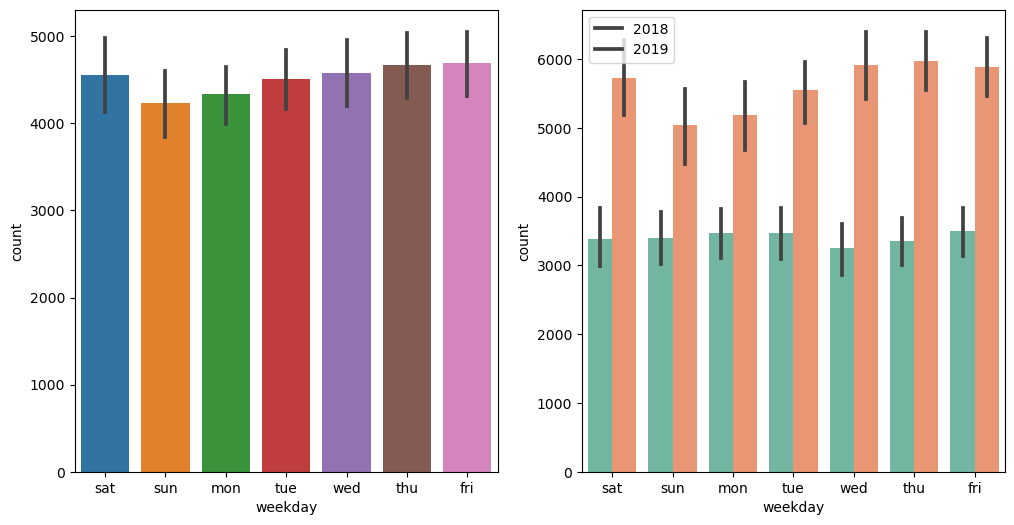

In [42]:
# plotting visualization for weekday column

plot_cat_columns('weekday')

Bike booking was more on wed, thu, fri and sat. Bike booking has increased drastically from 2018 to 2019

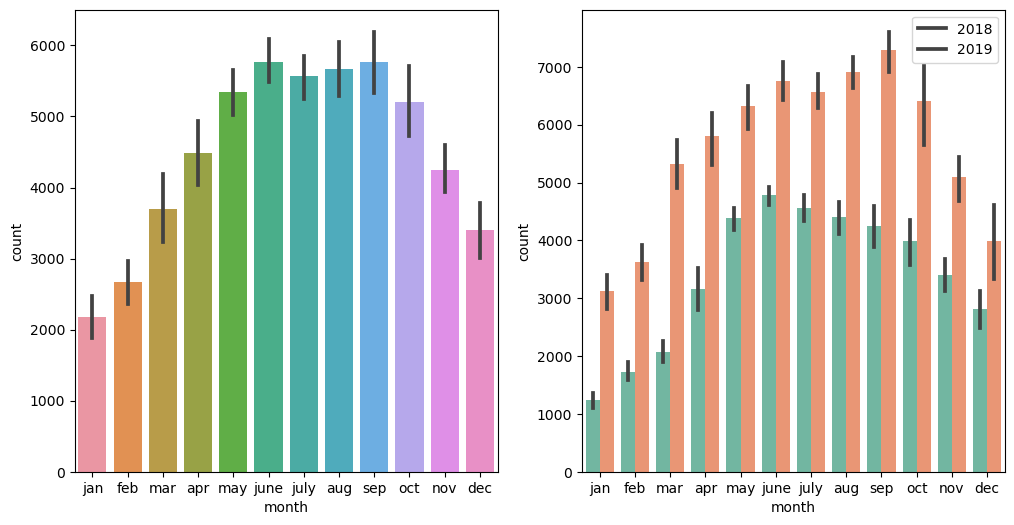

In [43]:
# plotting visualization for month column

plot_cat_columns('month')

Most number of bike bookings were done from May to September and then declined towards end of year. Bike booking has increased drastically from 2018 to 2019

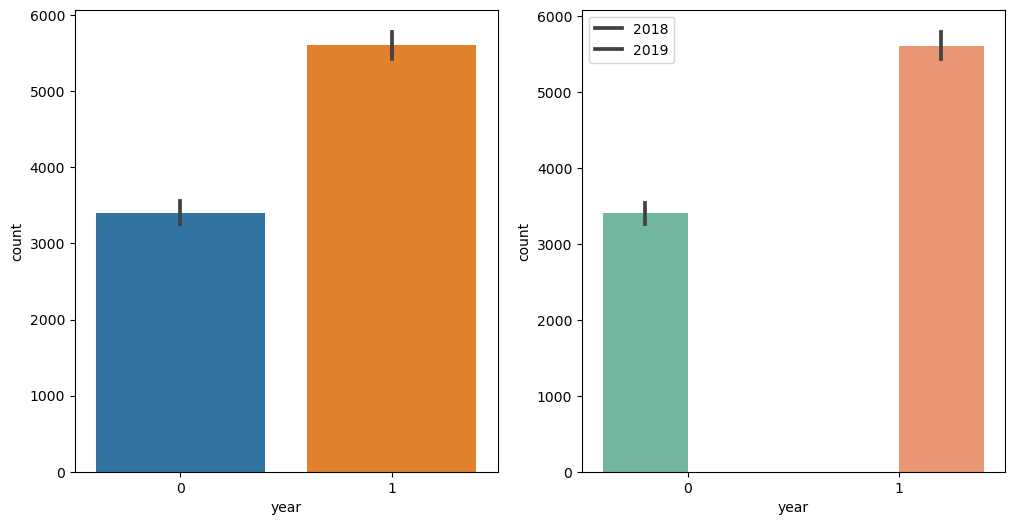

In [44]:
# plotting visualization for year column

plot_cat_columns('year')

Clearly the number of bookings have increased drastically from 2018 to 2019

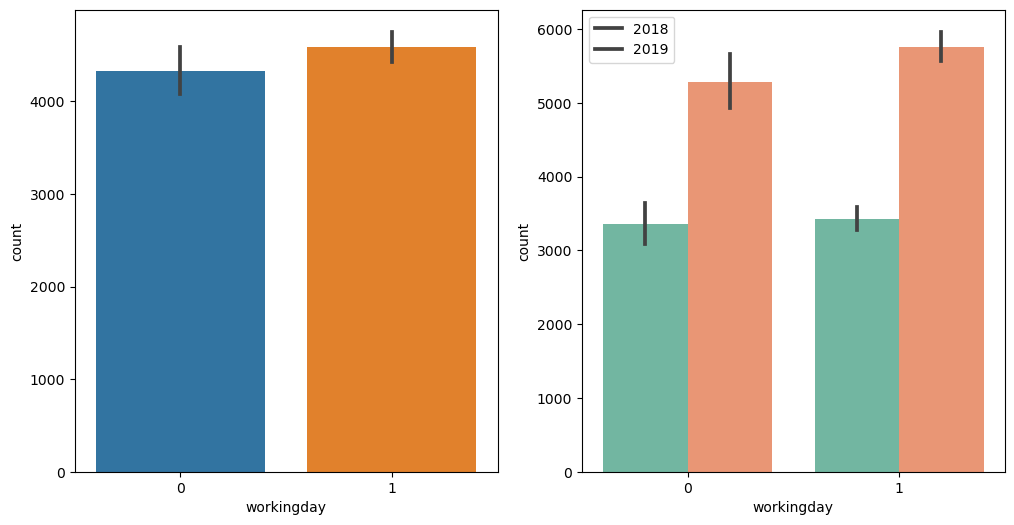

In [45]:
# plotting visualization for workingday column

plot_cat_columns('workingday')

 Bike booking has increased drastically from 2018 to 2019

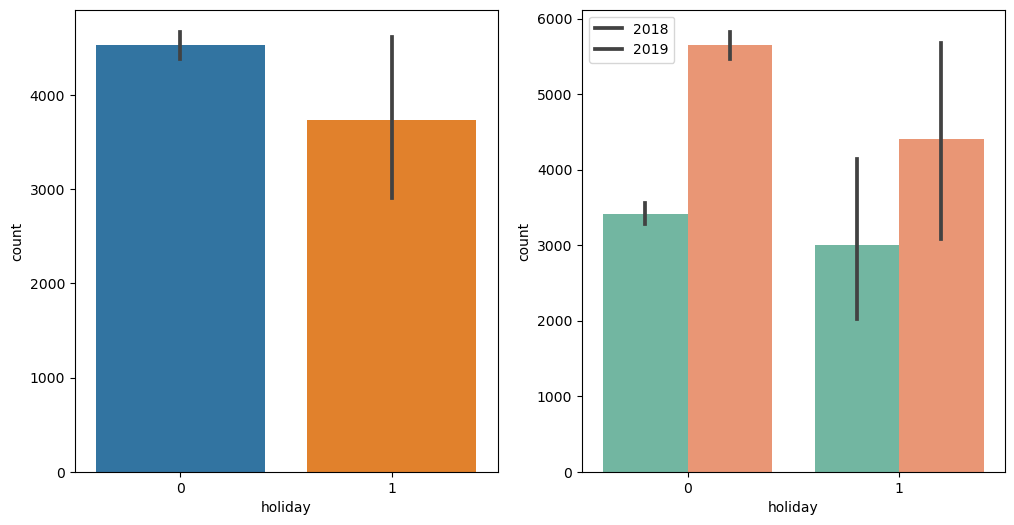

In [46]:
# plotting visualization for holiday column

plot_cat_columns('holiday')

Bookings in more on a holiday to a working day which was expected.Bike booking has increased drastically from 2018 to 2019

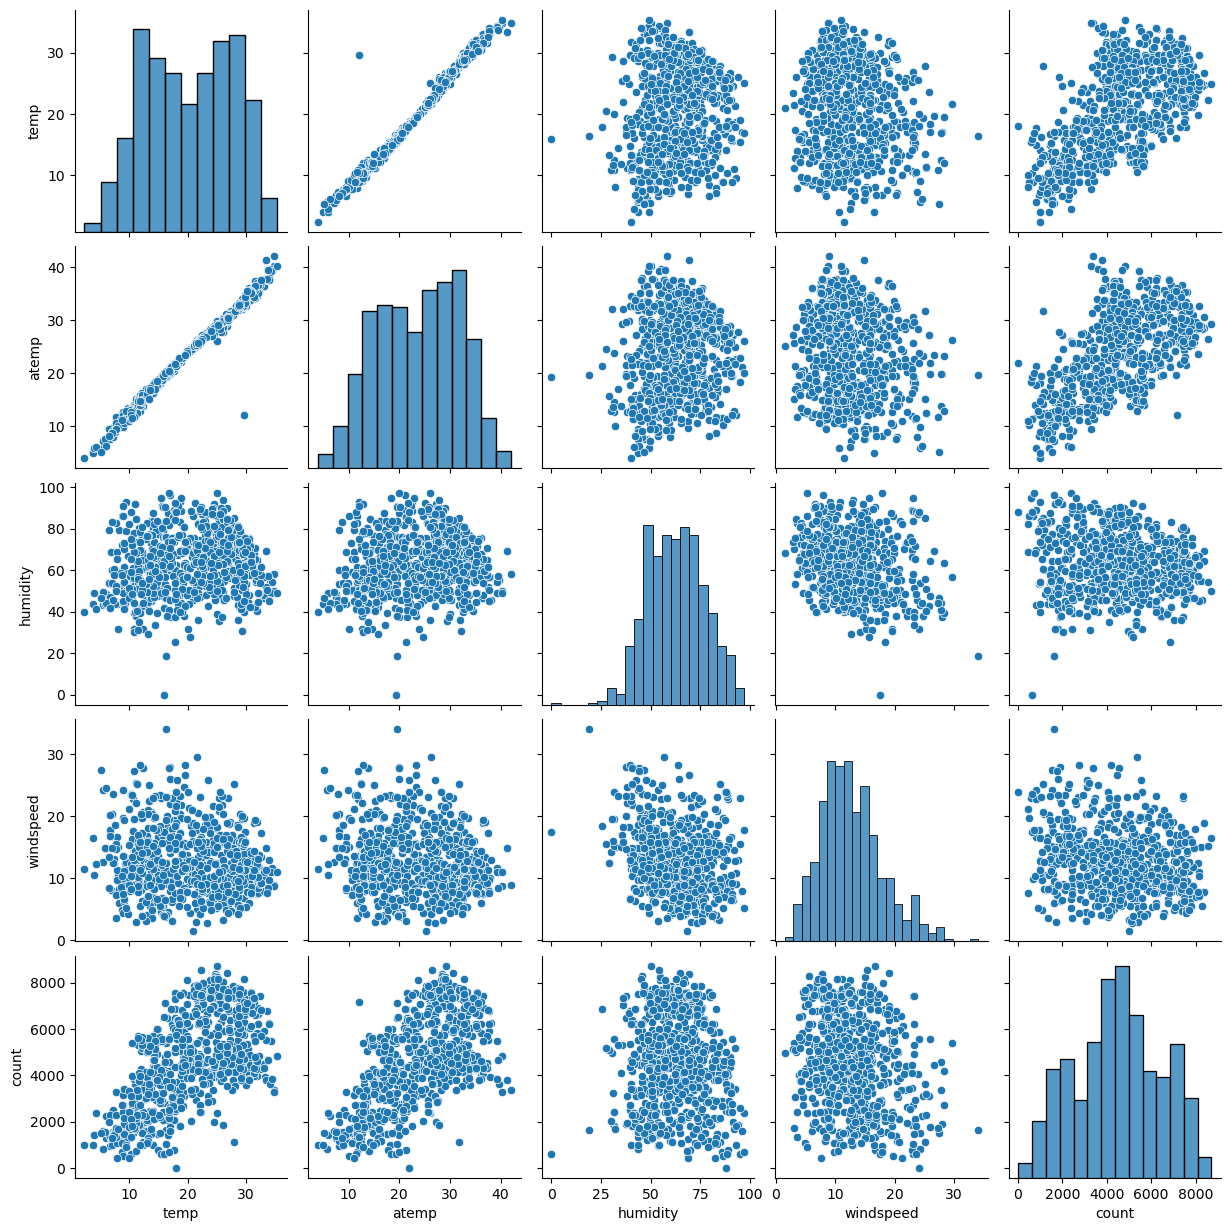

In [47]:
# Analysing the numerical columns

sns.pairplot(data=bike,vars=['temp','atemp','humidity','windspeed','count'])
plt.show()

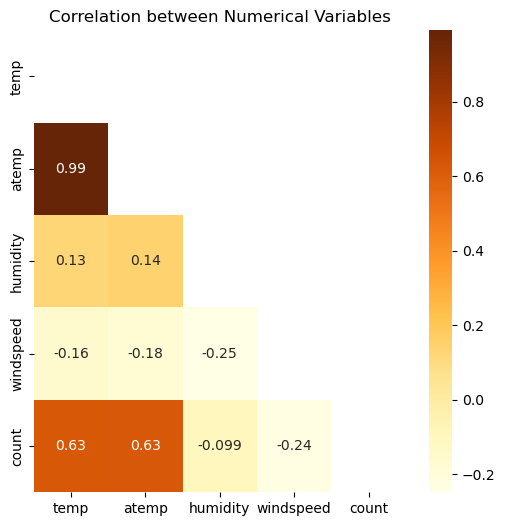

In [48]:
# Checking the correlation between the numerical variables

plt.figure(figsize = (6,6))
matrix = np.triu(bike[['temp','atemp','humidity','windspeed','count']].corr())
sns.heatmap(bike[['temp','atemp','humidity','windspeed','count']].corr(), annot = True, cmap="YlOrBr", mask=matrix)
plt.title("Correlation between Numerical Variables")
plt.show()

#### There is linear relationship between temp and atemp. Both of the parameters cannot be used in the model due to multicolinearity. We will decide which parameters to keep based on VIF and p-value w.r.t other variables

### Step 3: Data Preparation

In [49]:
# Dummy variable creation for month, weekday, weathersit and season variables.

months_df = pd.get_dummies(bike.month,drop_first=True).astype(int)
weekdays_df = pd.get_dummies(bike.weekday,drop_first=True).astype(int)
weathersit_df = pd.get_dummies(bike.weathersit,drop_first=True).astype(int)
seasons_df = pd.get_dummies(bike.season,drop_first=True).astype(int)

In [50]:
bike.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [51]:
# Merging  the dataframe, with the dummy variable dataset. 

bike_new = pd.concat([bike,months_df,weekdays_df,weathersit_df,seasons_df],axis=1)
bike_new.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,...,1,0,0,0,0,0,1,1,0,0
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,...,0,1,0,0,0,0,1,1,0,0
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,1,0,0,0,1,0,0
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,1,0,0,1,0,0


In [52]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          730 non-null    object 
 1   year            730 non-null    int64  
 2   month           730 non-null    object 
 3   holiday         730 non-null    int64  
 4   weekday         730 non-null    object 
 5   workingday      730 non-null    int64  
 6   weathersit      730 non-null    object 
 7   temp            730 non-null    float64
 8   atemp           730 non-null    float64
 9   humidity        730 non-null    float64
 10  windspeed       730 non-null    float64
 11  count           730 non-null    int64  
 12  aug             730 non-null    int32  
 13  dec             730 non-null    int32  
 14  feb             730 non-null    int32  
 15  jan             730 non-null    int32  
 16  july            730 non-null    int32  
 17  june            730 non-null    int

In [53]:
bike_new['year'].value_counts()

year
0    365
1    365
Name: count, dtype: int64

In [54]:
# dropping unnecessary columns as we have already created dummy variable out of it.

bike_new = bike_new.drop(['season','month','weekday','weathersit'], axis = 1)
bike_new.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,count,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,1,0,0,0,0,0,1,1,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,1,0,0,0,0,1,1,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,1,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,1,0,0,1,0,0


In [55]:
bike_new.shape

(730, 30)

In [56]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            730 non-null    int64  
 1   holiday         730 non-null    int64  
 2   workingday      730 non-null    int64  
 3   temp            730 non-null    float64
 4   atemp           730 non-null    float64
 5   humidity        730 non-null    float64
 6   windspeed       730 non-null    float64
 7   count           730 non-null    int64  
 8   aug             730 non-null    int32  
 9   dec             730 non-null    int32  
 10  feb             730 non-null    int32  
 11  jan             730 non-null    int32  
 12  july            730 non-null    int32  
 13  june            730 non-null    int32  
 14  mar             730 non-null    int32  
 15  may             730 non-null    int32  
 16  nov             730 non-null    int32  
 17  oct             730 non-null    int

### Step 4: Splitting the Data into Training and Testing Sets

In [57]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(bike_new, train_size = 0.7, test_size = 0.3, random_state = 100)
print(df_train.shape)
print(df_test.shape)

(510, 30)
(219, 30)


In [58]:
# Instantiate an object
scaler = MinMaxScaler()

# create a list of numeric vars
num_vars = ['temp','atemp','humidity','windspeed','count']

# fit on data
# scaler.fit_transform()

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,count,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,0,0,0,1,0,0,0,0,0,1
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,1,0,0,0,0,0,1,1,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,1,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,...,1,0,0,0,0,0,1,0,1,0


In [59]:
# describing the dataset

df_train.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,count,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000
mean,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,0.096078,0.084314,...,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.343137,0.243137,0.245098,0.24902
std,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,0.294988,0.278131,...,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475223,0.429398,0.430568,0.43287
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [60]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 510 entries, 653 to 79
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            510 non-null    int64  
 1   holiday         510 non-null    int64  
 2   workingday      510 non-null    int64  
 3   temp            510 non-null    float64
 4   atemp           510 non-null    float64
 5   humidity        510 non-null    float64
 6   windspeed       510 non-null    float64
 7   count           510 non-null    float64
 8   aug             510 non-null    int32  
 9   dec             510 non-null    int32  
 10  feb             510 non-null    int32  
 11  jan             510 non-null    int32  
 12  july            510 non-null    int32  
 13  june            510 non-null    int32  
 14  mar             510 non-null    int32  
 15  may             510 non-null    int32  
 16  nov             510 non-null    int32  
 17  oct             510 non-null    int32  

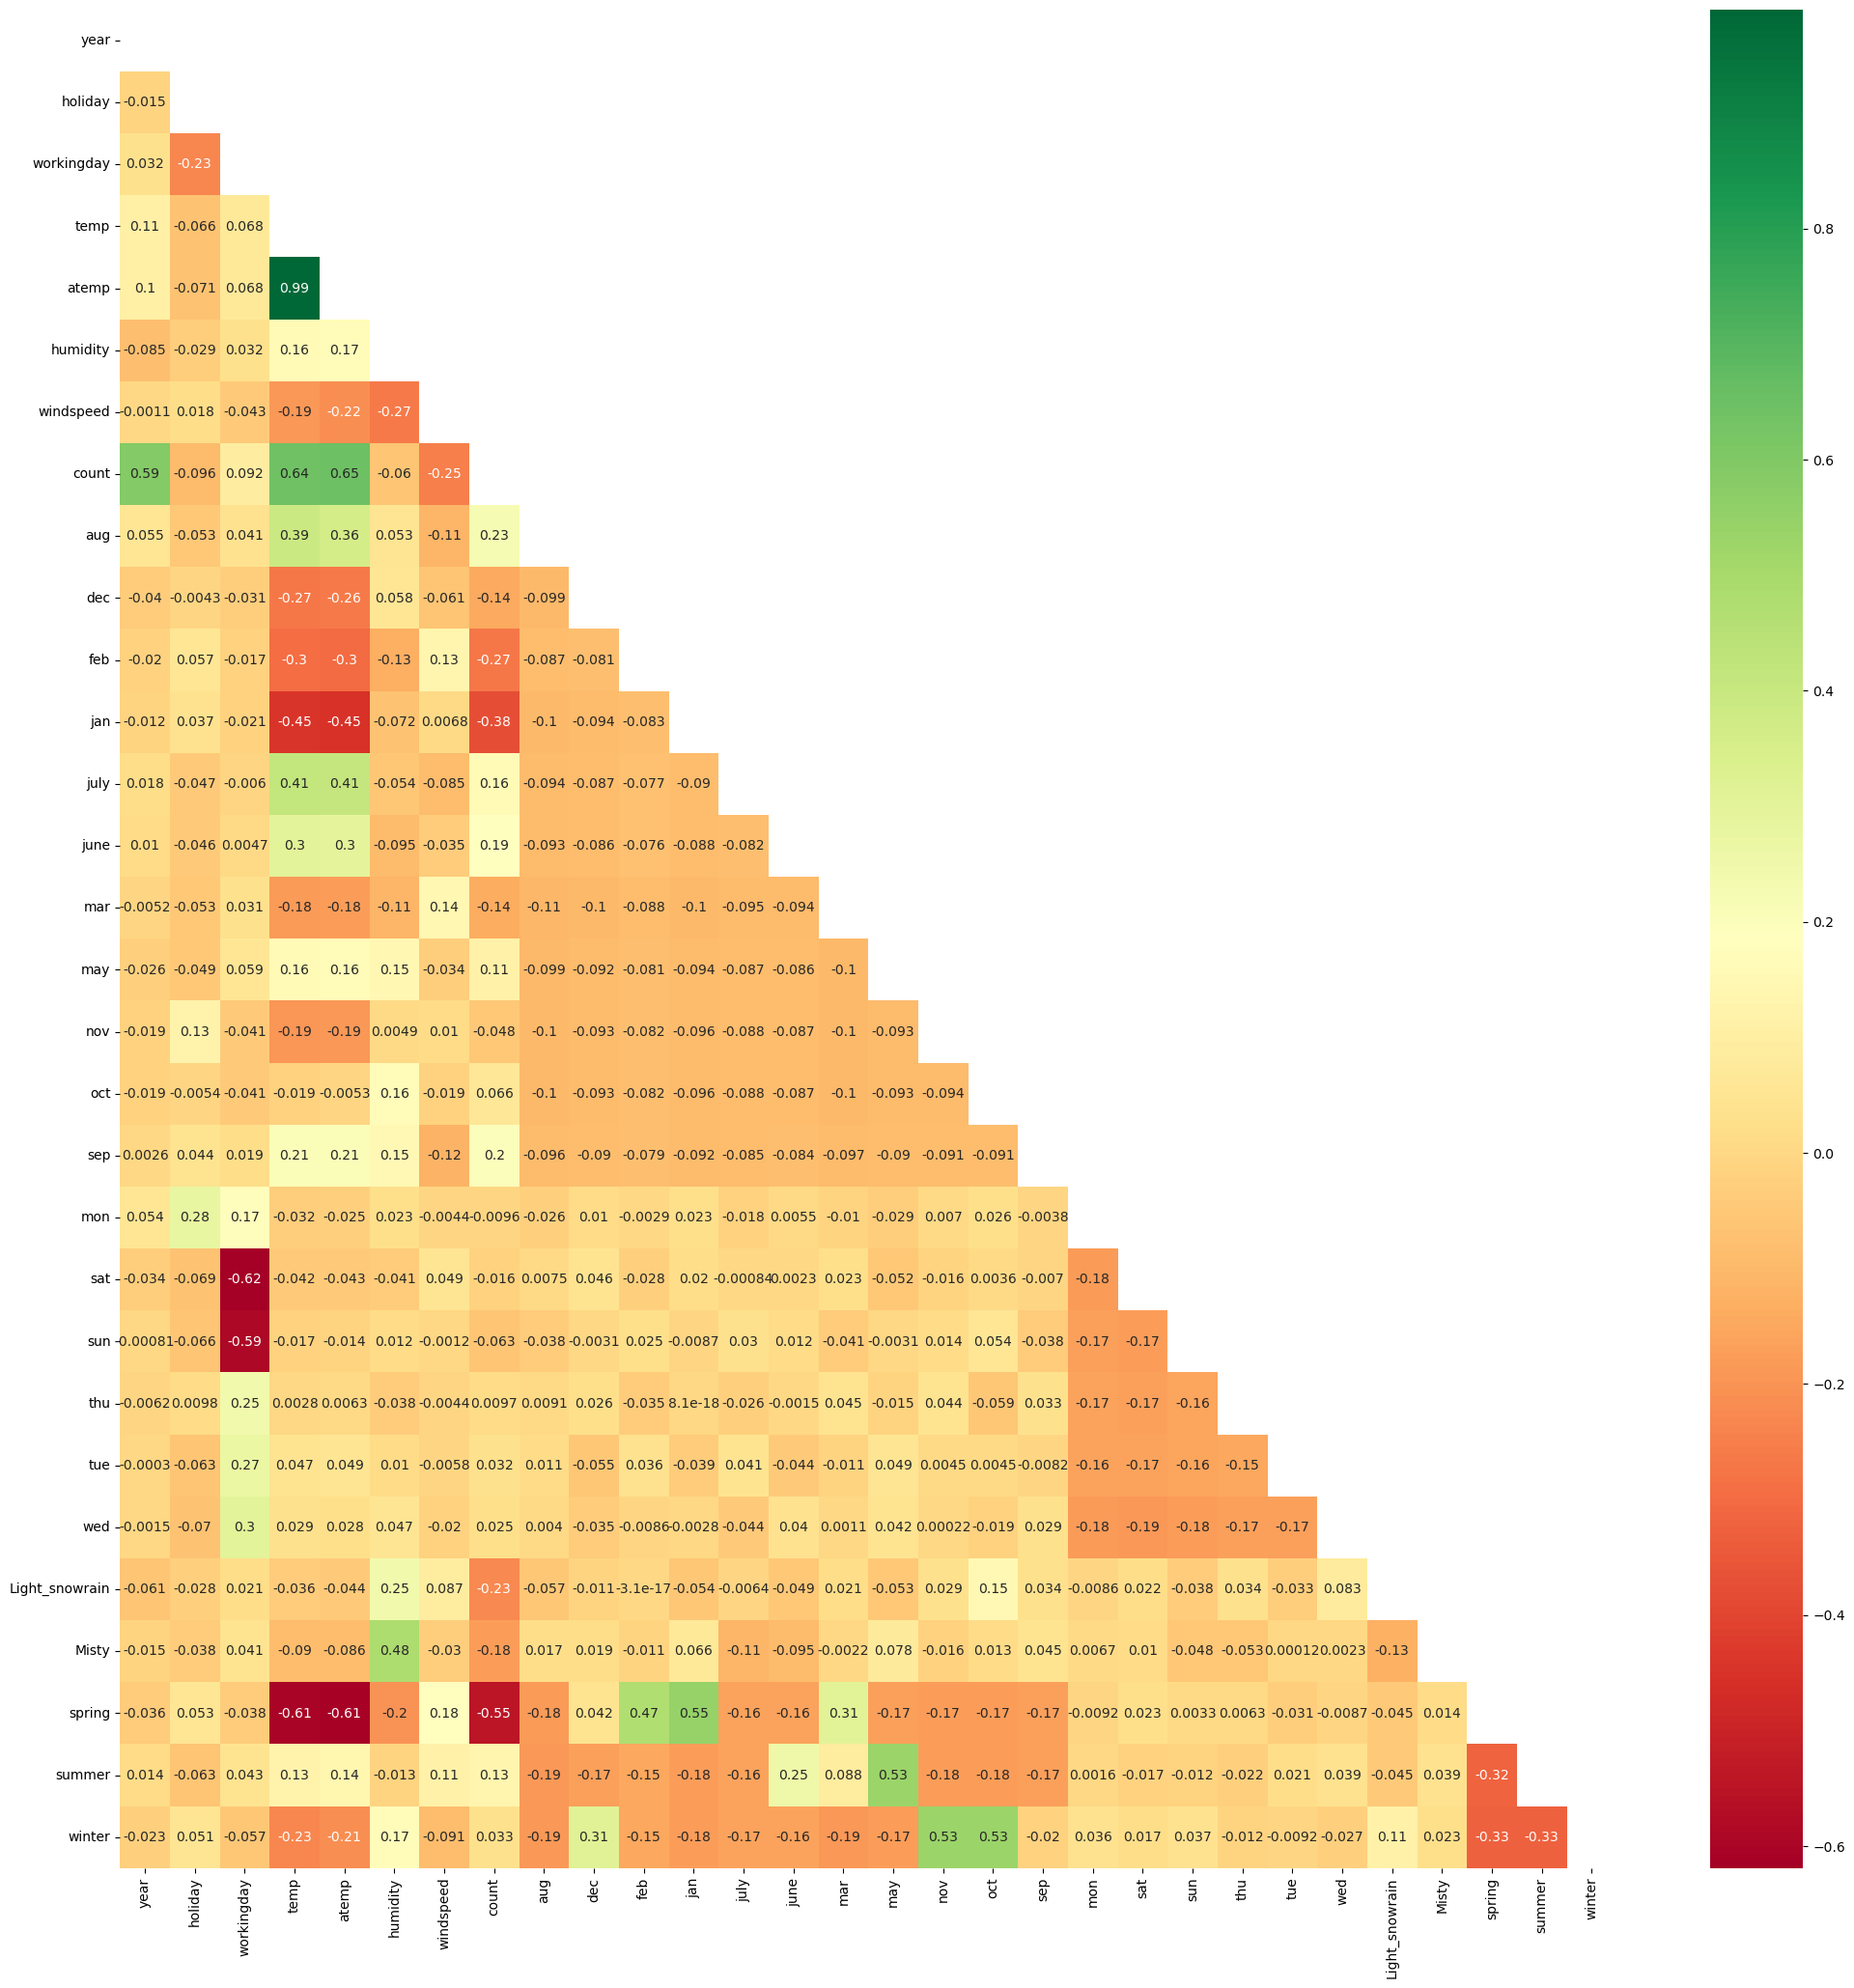

In [61]:
# check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (25,25))
matrix = np.triu(df_train.corr())
sns.heatmap(df_train.corr(), annot = True, cmap="RdYlGn", mask=matrix)
plt.show()

In [62]:
# Building the Linear Model

y_train = df_train.pop('count')
X_train = df_train

In [63]:
# Recursive feature elimination 

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator=lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [64]:
#List of variables selected in top 15 list

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('aug', False, 8),
 ('dec', False, 4),
 ('feb', False, 5),
 ('jan', False, 2),
 ('july', True, 1),
 ('june', False, 12),
 ('mar', False, 14),
 ('may', False, 7),
 ('nov', False, 3),
 ('oct', False, 10),
 ('sep', True, 1),
 ('mon', False, 15),
 ('sat', True, 1),
 ('sun', True, 1),
 ('thu', False, 13),
 ('tue', False, 9),
 ('wed', False, 11),
 ('Light_snowrain', True, 1),
 ('Misty', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1)]

In [65]:
# selecting the selected variable via RFE in col list

col = X_train.columns[rfe.support_]
print(col)

Index(['year', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed',
       'july', 'sep', 'sat', 'sun', 'Light_snowrain', 'Misty', 'spring',
       'summer', 'winter'],
      dtype='object')


In [66]:
X_train.columns[~rfe.support_]

Index(['atemp', 'aug', 'dec', 'feb', 'jan', 'june', 'mar', 'may', 'nov', 'oct',
       'mon', 'thu', 'tue', 'wed'],
      dtype='object')

### Step 5: Building a linear model

In [67]:
# Generic function to calculate VIF of variables

def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [68]:
# dataframe with RFE selected variables

X_train_rfe = X_train[col]

In [69]:
# calculate VIF

calculateVIF(X_train_rfe)

,Features,VIF
2,workingday,50.69
8,sat,12.20
9,sun,11.79
12,spring,5.02
3,temp,3.62
14,winter,3.49
1,holiday,2.91
13,summer,2.61
4,humidity,1.91
11,Misty,1.57


In [70]:

# Building 1st linear regression model

X_train_rfe = sm.add_constant(X_train_rfe)


In [71]:
lm = sm.OLS(y_train,X_train_rfe).fit()


In [72]:
print(lm.summary())


                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Mon, 12 Feb 2024   Prob (F-statistic):          1.13e-191
Time:                        19:08:34   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1989      0.028      7.

In [73]:
# As working day shows high VIF values hence we can drop it
X_train_new = X_train_rfe.drop(['workingday'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
0,const,74.93
12,spring,5.02
3,temp,3.62
14,winter,3.49
13,summer,2.61
4,humidity,1.91
11,Misty,1.57
6,july,1.49
7,sep,1.30
10,Light_snowrain,1.25


In [74]:
# As const shows high VIF value hence we can drop it
X_train_new = X_train_new.drop(['const'], axis = 1)


In [75]:

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
3,humidity,28.28
2,temp,16.06
4,windspeed,4.68
11,spring,4.03
13,winter,3.37
12,summer,2.78
10,Misty,2.30
0,year,2.08
5,july,1.59
6,sep,1.39


In [76]:
# As humidity shows high VIF value hence we can drop it
X_train_new = X_train_new.drop(['humidity'], axis = 1)
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,temp,5.18
3,windspeed,4.62
11,summer,2.23
10,spring,2.13
0,year,2.07
12,winter,1.84
4,july,1.59
9,Misty,1.55
5,sep,1.34
6,sat,1.23


In [77]:
# Building 2nd linear regression model

X_train_lm_2 = sm.add_constant(X_train_new)
lr_2 = sm.OLS(y_train,X_train_lm_2).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     203.0
Date:                Mon, 12 Feb 2024   Prob (F-statistic):          5.73e-189
Time:                        19:08:34   Log-Likelihood:                 508.65
No. Observations:                 510   AIC:                            -989.3
Df Residuals:                     496   BIC:                            -930.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2039      0.029      6.

In [78]:
# As sat shows high p value hence we can drop it
X_train_new = X_train_new.drop(['sat'], axis = 1)
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,temp,5.14
3,windspeed,4.60
10,summer,2.22
9,spring,2.11
0,year,2.07
11,winter,1.82
4,july,1.59
8,Misty,1.55
5,sep,1.34
6,sun,1.18


In [79]:
# Building 3rd linear regression model

X_train_lm_3 = sm.add_constant(X_train_new)
lr_3 = sm.OLS(y_train,X_train_lm_3).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     219.8
Date:                Mon, 12 Feb 2024   Prob (F-statistic):          6.45e-190
Time:                        19:08:34   Log-Likelihood:                 508.10
No. Observations:                 510   AIC:                            -990.2
Df Residuals:                     497   BIC:                            -935.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2063      0.029      7.

In [80]:
# As july shows high p value hence we can drop it
X_train_new = X_train_new.drop(['july'], axis = 1)
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
3,windspeed,4.59
2,temp,3.91
0,year,2.07
8,spring,2.02
9,summer,1.90
10,winter,1.66
7,Misty,1.55
4,sep,1.23
5,sun,1.18
6,Light_snowrain,1.08


In [81]:
# Building 4th linear regression model

X_train_lm_4 = sm.add_constant(X_train_new)
lr_4 = sm.OLS(y_train,X_train_lm_4).fit()
print(lr_4.summary())


                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     236.1
Date:                Mon, 12 Feb 2024   Prob (F-statistic):          1.51e-189
Time:                        19:08:35   Log-Likelihood:                 504.38
No. Observations:                 510   AIC:                            -984.8
Df Residuals:                     498   BIC:                            -933.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1983      0.029      6.

In [82]:
# As spring shows high p value hence we can drop it
X_train_new = X_train_new.drop(['spring'], axis = 1)
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,temp,3.72
3,windspeed,3.08
0,year,2.00
8,summer,1.56
7,Misty,1.48
9,winter,1.39
4,sep,1.21
5,sun,1.16
6,Light_snowrain,1.08
1,holiday,1.04


In [83]:
# Building 5th linear regression model

X_train_lm_5 = sm.add_constant(X_train_new)
lr_5 = sm.OLS(y_train,X_train_lm_5).fit()
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     256.0
Date:                Mon, 12 Feb 2024   Prob (F-statistic):          2.88e-189
Time:                        19:08:35   Log-Likelihood:                 500.84
No. Observations:                 510   AIC:                            -979.7
Df Residuals:                     499   BIC:                            -933.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1350      0.017      8.

In [84]:
# Checking the parameters and their coefficient values
lr_5.params

const             0.134956
year              0.232661
holiday          -0.107197
temp              0.547141
windspeed        -0.153106
sep               0.099241
sun              -0.049981
Light_snowrain   -0.289246
Misty            -0.081871
summer            0.086611
winter            0.132288
dtype: float64

### Step 6: Residual Analysis of the train data and validation

In [85]:
X_train_lm_5

,const,year,holiday,temp,windspeed,sep,sun,Light_snowrain,Misty,summer,winter
653,1.0,1,0,0.509887,0.300794,0,0,0,0,0,1
576,1.0,1,0,0.815169,0.264686,0,0,0,0,0,0
426,1.0,1,0,0.442393,0.255342,0,0,0,1,0,0
728,1.0,1,0,0.245101,0.663106,0,1,0,0,0,0
482,1.0,1,0,0.395666,0.188475,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
526,1.0,1,0,0.824514,0.355596,0,0,0,1,1,0
578,1.0,1,0,0.863973,0.187140,0,0,0,0,0,0
53,1.0,0,0,0.202618,0.111379,0,0,0,0,0,0
350,1.0,0,0,0.248216,0.431816,0,0,0,1,0,1


In [86]:
y_train_pred = lr_5.predict(X_train_lm_5)

#### Normality of error terms

Text(0.5, 0, 'Errors')

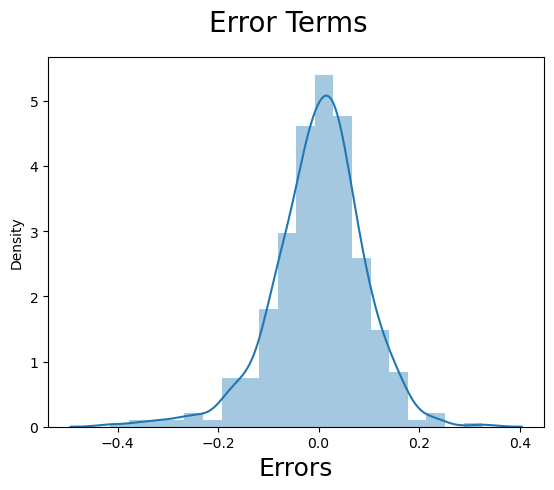

In [87]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)

Error terms are following normal distribution

### Multi Colinearity

In [88]:
calculateVIF(X_train_new)

,Features,VIF
2,temp,3.72
3,windspeed,3.08
0,year,2.00
8,summer,1.56
7,Misty,1.48
9,winter,1.39
4,sep,1.21
5,sun,1.16
6,Light_snowrain,1.08
1,holiday,1.04


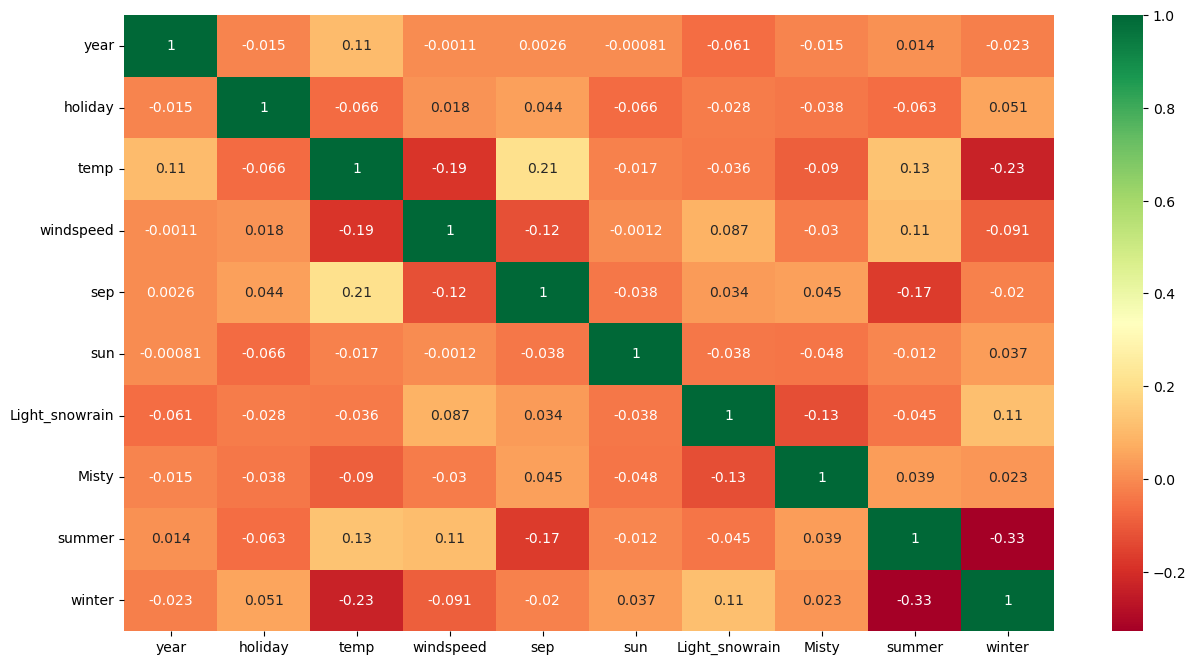

In [89]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train_new.corr(),annot = True, cmap="RdYlGn")
plt.show()

VIF values are less than 5 which is good and also there is no multicolinearity as seen from the heatmap.

### Step 7: Making Predictions Using the Final Model

In [90]:
# Applying scaling on the test dataset

num_vars = ['temp', 'atemp', 'humidity', 'windspeed','count']
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,count,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,0,0,1,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,0,...,0,0,0,0,1,0,0,0,1,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,0,1,0,0,0,1,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,1,0,...,0,0,0,0,1,0,0,0,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,0,...,0,0,1,0,0,0,0,0,1,0


In [91]:

df_test.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,count,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558941,0.532991,0.638508,0.313350,0.520592,0.059361,0.086758,...,0.118721,0.146119,0.164384,0.164384,0.100457,0.027397,0.319635,0.255708,0.264840,0.232877
std,0.500722,0.188034,0.459904,0.233698,0.217888,0.148974,0.159947,0.218435,0.236840,0.282125,...,0.324202,0.354034,0.371472,0.371472,0.301297,0.163612,0.467403,0.437258,0.442259,0.423633
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [92]:
y_test = df_test.pop('count')
X_test = df_test

In [93]:
col1 = X_train_new.columns

X_test = X_test[col1]

# Adding constant variable to test dataframe
X_test_5 = sm.add_constant(X_test)

In [94]:
y_pred = lr_5.predict(X_test_5)

In [95]:
r2 = r2_score(y_test, y_pred)
round(r2,4)

0.7958

### Step 8: Model Evaluation

Text(0, 0.5, 'y_pred')

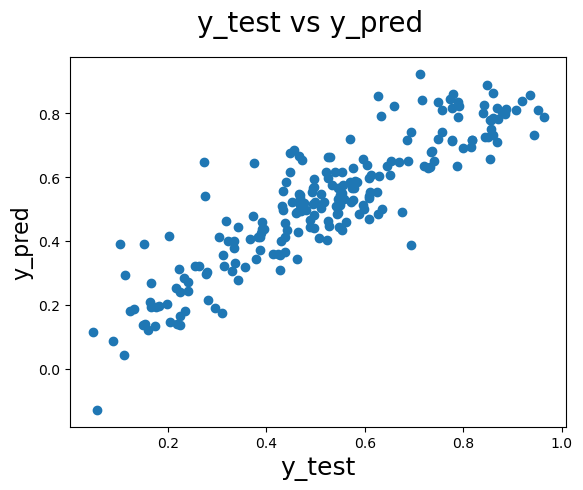

In [100]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(x=y_test, y=y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16) 

In [97]:
round(lr_5.params,4)

const             0.1350
year              0.2327
holiday          -0.1072
temp              0.5471
windspeed        -0.1531
sep               0.0992
sun              -0.0500
Light_snowrain   -0.2892
Misty            -0.0819
summer            0.0866
winter            0.1323
dtype: float64

We can see that the equation of our best fitted line is:

count = 0.1350 + 0.237 * year - 0.1072 * holiday + 0.5471 * temp - 0.1531 * windspeed + 0.0992 * sep - 0.05 * sun - 0.2892 * Light_snowrain - 0.0819 * Misty + 0.0866 * summer + 0.1323 * winter

In [98]:
# Calculating Adjusted-R^2 value for the test dataset

adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.786


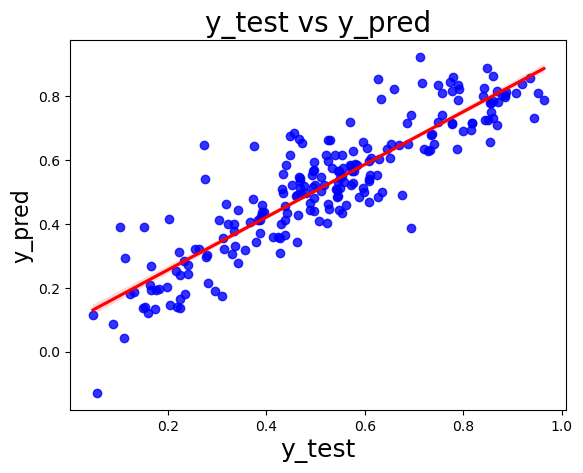

In [99]:
# Visualizing the fit on the test data
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

## Comparision between Training and Testing dataset:

- Train dataset R^2          : 0.837
- Test dataset R^2           : 0.795
- Train dataset Adjusted R^2 : 0.824    
- Test dataset Adjusted R^2  : 0.786
    
#### Demand of bikes depend on year, holiday, temp, windspeed, sep, Light_snowrain, Misty, sun, summer and winter.